<a href="https://colab.research.google.com/github/ab-rohman/Computer_Vision/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [182]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np

Mengubah Tingkat kecerahan Citra
---------------------------------
Masukkan nilai kecerahan : 50


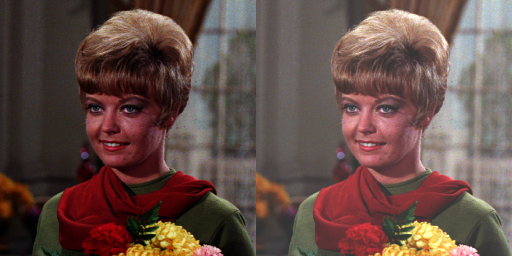

In [32]:
print("Mengubah Tingkat kecerahan Citra")
print("---------------------------------")
try:
  brightness = int(input("Masukkan nilai kecerahan : "))
except ValueError:
  print("Error, not a Number")

original = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/female.tiff')
brightness_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image[y,x,c] = np.clip(1*original[y,x,c] + brightness, 0, 255)
#rumus np.clip(a, a_min, a_max) kenapa kok perlu min sama max? karena kyak di materi itu dijelaskan bahwa
  #kita itu bisa nambah brightness terserah baik - maupun +, bayangkan nilai awalnya 240 klw tambah 50 jadi 290 dong

#new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255) ini rumus ngubah brightness(beta) & contras(alpha)

#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs(original, beta=brightness)
#new_image = cv.convertScaleAbs(image, alpha=alpha, beta=beta)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)
      

In [33]:
brightness_image

array([[[ 92,  96, 102],
        [ 88,  90,  97],
        [ 84,  92, 100],
        ...,
        [186, 181, 187],
        [186, 187, 176],
        [180, 184, 176]],

       [[ 93,  95, 105],
        [ 85,  94, 100],
        [ 88,  90, 104],
        ...,
        [193, 189, 179],
        [189, 184, 179],
        [196, 192, 171]],

       [[ 89,  92,  96],
        [ 93,  92,  99],
        [105,  92, 102],
        ...,
        [183, 187, 176],
        [180, 181, 173],
        [178, 184, 168]],

       ...,

       [[ 55,  55,  54],
        [ 54,  53,  53],
        [ 53,  53,  53],
        ...,
        [ 94, 114, 110],
        [141, 143, 134],
        [143, 155, 148]],

       [[ 60,  58,  61],
        [ 62,  61,  62],
        [ 60,  60,  62],
        ...,
        [ 90, 118, 110],
        [114, 138, 136],
        [141, 155, 150]],

       [[ 66,  68,  70],
        [ 66,  66,  69],
        [ 63,  64,  70],
        ...,
        [ 92, 106, 105],
        [108, 128, 120],
        [130, 150, 143]]

In [34]:
original

array([[[ 42,  46,  52],
        [ 38,  40,  47],
        [ 34,  42,  50],
        ...,
        [136, 131, 137],
        [136, 137, 126],
        [130, 134, 126]],

       [[ 43,  45,  55],
        [ 35,  44,  50],
        [ 38,  40,  54],
        ...,
        [143, 139, 129],
        [139, 134, 129],
        [146, 142, 121]],

       [[ 39,  42,  46],
        [ 43,  42,  49],
        [ 55,  42,  52],
        ...,
        [133, 137, 126],
        [130, 131, 123],
        [128, 134, 118]],

       ...,

       [[  5,   5,   4],
        [  4,   3,   3],
        [  3,   3,   3],
        ...,
        [ 44,  64,  60],
        [ 91,  93,  84],
        [ 93, 105,  98]],

       [[ 10,   8,  11],
        [ 12,  11,  12],
        [ 10,  10,  12],
        ...,
        [ 40,  68,  60],
        [ 64,  88,  86],
        [ 91, 105, 100]],

       [[ 16,  18,  20],
        [ 16,  16,  19],
        [ 13,  14,  20],
        ...,
        [ 42,  56,  55],
        [ 58,  78,  70],
        [ 80, 100,  93]]

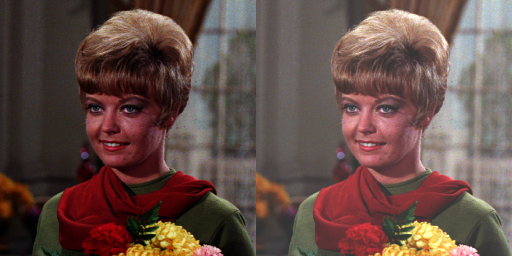

In [11]:
brightness_image2 = cv.convertScaleAbs(original, beta=brightness)
final_frame2 = cv.hconcat((original, brightness_image2))
cv2_imshow(final_frame2)

1. Implement contrast transformation in Google Collaboratory using the formula written
in the Theoretical background section, giving the output shown in the following figure:

Mengubah Tingkat kontras dan keceranhan Citra
---------------------------------
Masukkan kecerahan [-255 - 255] : 60
Masukkan kontras [1.0 - 3.0] : 1.5


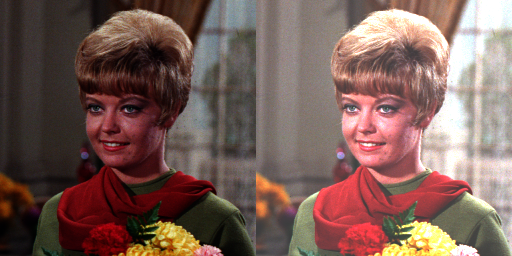

In [37]:
from contextlib import AbstractAsyncContextManager
print("Mengubah Tingkat kontras dan keceranhan Citra")
print("---------------------------------")
try:
  brightness = int(input("Masukkan kecerahan [-255 - 255] : "))
  contras = float(input("Masukkan kontras [1.0 - 3.0] : "))
except ValueError:
  print("Error, not a Number")

contras_image = np.zeros(original.shape, original.dtype)

#akses per piksel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      contras_image[y,x,c] = np.clip(contras*original[y,x,c] + brightness, 0, 255)

#result_image = cv.convertScaleAbs(original, alpha=contras,beta=brightness)

final_frame = cv.hconcat((original, contras_image))
cv2_imshow(final_frame)

Implement transformation of logarithmic brightness on Google Colaboratory using the formula written in the Theoretical Background Reviews, generating output shown in the following figure:

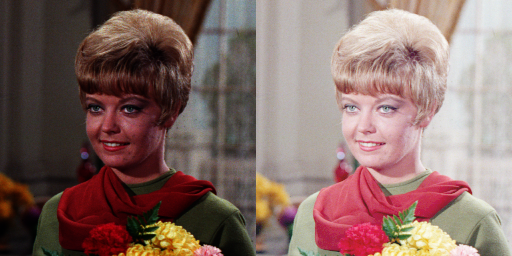

In [59]:
c = 255 / np.log(1 + np.max(original))
log_image = c * (np.log(original + 1))
log_image = np.array(log_image, dtype = np.uint8)

final_frame3 = cv.hconcat((original, log_image))
cv2_imshow(final_frame3)

Mengubah Tingkat kecerahan Citra dengan Transformasi Log
---------------------------------
Masukkan kecerahan : 40


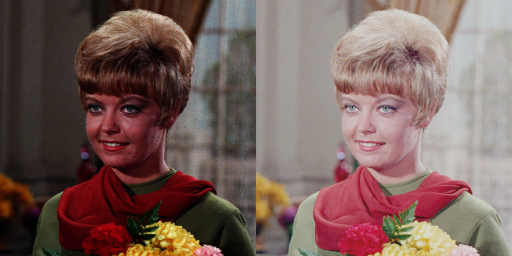

In [60]:
print("Mengubah Tingkat kecerahan Citra dengan Transformasi Log")
print("---------------------------------")
try:
  constanta = int(input("Masukkan kecerahan : "))
except ValueError:
  print("Error, not a Number")

log_image = constanta * (np.log(original + 1))
log_image = np.array(log_image, dtype = np.uint8)

final_frame3 = cv.hconcat((original, log_image))
cv2_imshow(final_frame3)

**Averaging**

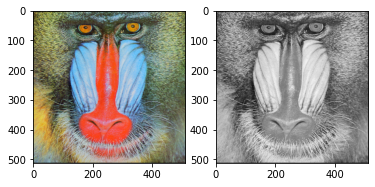

In [128]:
ori_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/mandrill.tiff')
img_cvt = cv.cvtColor(ori_img,cv.COLOR_BGR2RGB)
avg_image = np.mean(ori_img, axis=2)
fig = plt.figure()
X = 1
Y = 2
imgplot = 1
ax1 = fig.add_subplot(X, Y, imgplot)
plt.imshow(img_cvt)
img2plot =  2
ax2 = fig.add_subplot(X, Y, img2plot)
plt.imshow(avg_image, cmap='gray')
plt.show()

**Luminance**

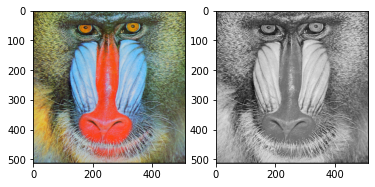

In [86]:
ori_img2 = ori_img.copy()
img_cvt2 = cv.cvtColor(ori_img2,cv.COLOR_BGR2RGB)
R, G, B = img_cvt2[:,:,0], img_cvt2[:,:,1], img_cvt2[:,:,2]
#ini cuma buat ngambil warna dari tiap pixel
luminance_img = 0.2126 * R + 0.7152 * G + 0.0722 * B
fig = plt.figure()
X = 1
Y = 2
imgplot = 1
ax1 = fig.add_subplot(X, Y, imgplot)
plt.imshow(img_cvt)
img2plot =  2
ax2 = fig.add_subplot(X, Y, img2plot)
plt.imshow(luminance_img, cmap='gray')
plt.show()

**Lightness**

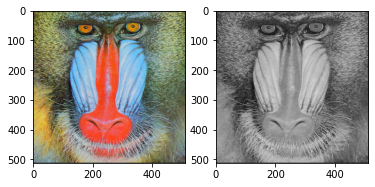

In [142]:
ori_img3 = ori_img.copy()
ori_img3[:] = np.max(ori_img3,axis=-1,keepdims=True)/2+np.min(ori_img3,axis=-1,keepdims=True)/2
fig = plt.figure()
X = 1
Y = 2
imgplot = 1
ax1 = fig.add_subplot(X, Y, imgplot)
plt.imshow(img_cvt)
img2plot =  2
ax2 = fig.add_subplot(X, Y, img2plot)
plt.imshow(ori_img3)
plt.show()

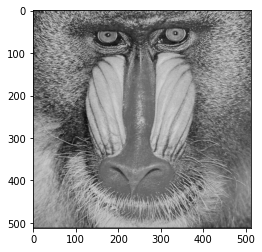

In [151]:
from PIL import Image
ori_img4 = Image.open('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/mandrill.tiff')
pixel_map = ori_img4.load()
width, height = ori_img4.size

for i in range(width):
	for j in range(height):
		r, g, b = ori_img4.getpixel((i, j))
		grayscale = (0.2126*r + 0.7152*g + 0.0722*b)
		pixel_map[i, j] = (int(grayscale), int(grayscale), int(grayscale))
plt.imshow(ori_img4)


In [ ]:
task4_image = ori_img.copy()

#akses per piksel
for y in range(ori_img3.shape[0]):
  for x in range(ori_img3.shape[1]):
    for c in range(ori_img3.shape[2]):
      task4_image[y,x,c] = np.clip(contras*original[y,x,c] + brightness, 0, 255)

#result_image = cv.convertScaleAbs(original, alpha=contras,beta=brightness)

final_frame = cv.hconcat((original, contras_image))
cv2_imshow(final_frame)

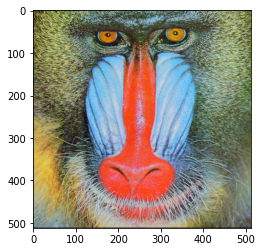

In [155]:
from PIL import Image
ori_img4 = Image.open('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/mandrill.tiff')
img = ori_img4.convert("RGB")

width = img.size[0] 
height = img.size[1] 
for i in range(0,width):# process all pixels
    for j in range(0,height):
        data = img.getpixel((i,j))
        if (data[0]==255 and data[1]==255 and data[2]==255):
            img.putpixel((i,j),(44, 44, 44))
plt.imshow(img)

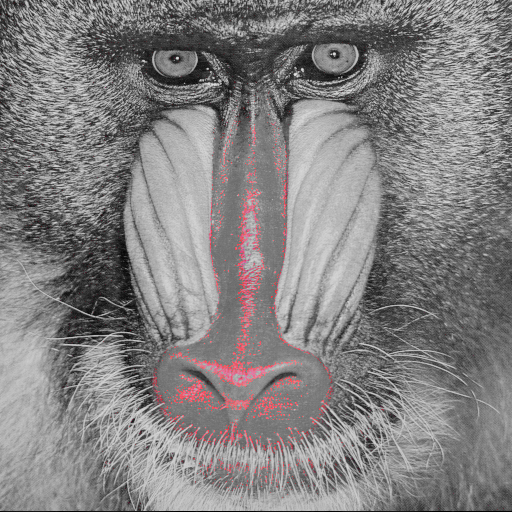

In [185]:
task4_image = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/mandrill.tiff')
# get image height and width
height, width, channels = task4_image.shape

#convert the BGR image to HSV colour space
hsv = cv.cvtColor(task4_image, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(task4_image, cv.COLOR_BGR2GRAY)

# set the bounds for the red hue
lower_red = np.array([160,100,50])
upper_red = np.array([180,255,255])

# create a mask using the bounds set
mask = cv.inRange(hsv, lower_red, upper_red)
# create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
# Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(task4_image, task4_image, mask=mask)
# Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
# convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
# add the foreground and the background
img_task4 = cv.add(res, background)
cv2_imshow(img_task4)

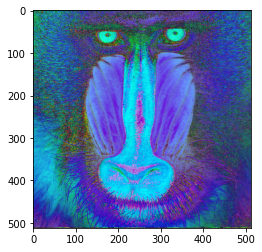

In [166]:
plt.imshow(hsv)

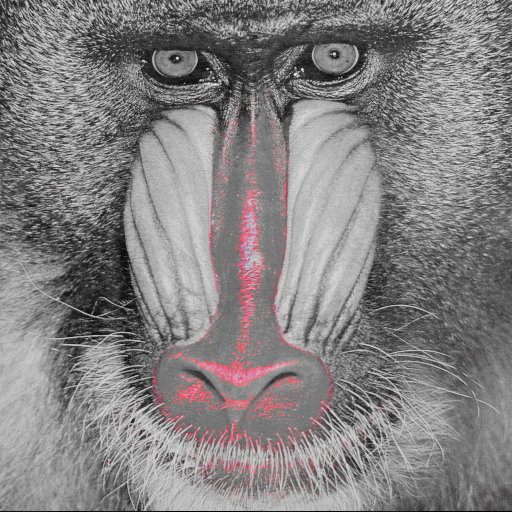

In [219]:
new_img = cv.imread('/content/drive/MyDrive/Colab Notebooks/Images_PCVK/Images/mandrill.tiff')
#convert the BGR image to HSV colour space
hsv = cv.cvtColor(new_img, cv.COLOR_BGR2HSV)
#obtain the grayscale image of the original image
gray = cv.cvtColor(new_img, cv.COLOR_BGR2GRAY)

#set the bounds for the red hue
lower_red = np.array([150,50,90])
upper_red = np.array([180,255,255])

#create a mask using the bounds set
mask = cv.inRange(hsv, lower_red, upper_red)
#create an inverse of the mask
mask_inv = cv.bitwise_not(mask)
#Filter only the red colour from the original image using the mask(foreground)
res = cv.bitwise_and(new_img, new_img, mask=mask)
#Filter the regions containing colours other than red from the grayscale image(background)
background = cv.bitwise_and(gray, gray, mask = mask_inv)
#convert the one channelled grayscale background to a three channelled image
background = np.stack((background,)*3, axis=-1)
#add the foreground and the background
added_img = cv.add(res, background)
cv2_imshow(added_img)